In [1]:
import numpy as np  
import pandas as pd 
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.integrate import odeint  

def SIR(y,t,beta,gamma):
    S,I,R = y
    dSdt = - S*(I/(S+I+R))*beta
    dIdt = beta*S*I/(S+I+R)-gamma*I
    dRdt = gamma*I
    return [dSdt,dIdt,dRdt]

data = pd.read_csv('Data_India.csv')
India = data[data['Country']=='India']

In [2]:
def loss(parameters,infectious, recovered, y0):
    # 确定训练模型的天数
    size = len(infectious)
    # 设置时间跨度
    t = np.linspace(1,size,size)
    beta, gamma = parameters
    # 计算预测值
    solution = odeint(SIR, y0, t, args=(beta, gamma))
    # 计算每日的感染者人数的预测值和真实值的均方误差
    l1 = np.mean((solution[:,1] - infectious)**2)
    # 计算每日的治愈者人数的预测值和真实值之间的均方误差
    l2 = np.mean((solution[:,2] - recovered)**2)
    # 返回SIR模型的损失值
    return l1+l2

In [3]:
India.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,total_confirmed,total_deaths,total_recoverd
0,2021/1/1,IN,India,SEARO,20035,10286709,256,148994,10286709,148994,9883461
1,2021/1/2,IN,India,SEARO,19079,10305788,224,149218,10305788,149218,9927310
2,2021/1/3,IN,India,SEARO,18177,10323965,217,149435,10323965,149435,9946867
3,2021/1/4,IN,India,SEARO,16504,10340469,214,149649,10340469,149649,9975958
4,2021/1/5,IN,India,SEARO,16375,10356844,201,149850,10356844,149850,9997272


In [4]:
India_t = India.set_index('Date_reported').loc['2021/3/12':'2021/5/24']

infectious_train = India_t['total_confirmed']

recovered_train = India_t['total_recoverd'] + India_t['total_deaths']

N = 13.24e8

susceptible_train = N - recovered_train - infectious_train


India_v = India.set_index('Date_reported').loc['2021/5/25':'2021/6/1']

infectious_valid = India_v['total_confirmed']

recovered_valid = India_v['total_recoverd'] + India_v['total_deaths']




In [5]:
I0 = 11308846 
R0 = 158306+10973260
S0 = N - I0 - R0
y0 = [S0,I0,R0]


# 训练模型
optimal = minimize(loss,[0.0001,0.0001],
                   args=(infectious_train,recovered_train,y0),
                   method='L-BFGS-B',
                   bounds=[(0.00000001, 1), (0.00000001, 1)])

In [6]:
beta,gamma = optimal.x
print([beta,gamma])

[0.019595125332613445, 0.008029863283167734]


In [7]:
I0_valid = 26948874
R0_valid = 307231 + 24350816
S0_valid = N - I0_valid- R0_valid
y0_valid = [S0_valid, I0_valid, R0_valid]

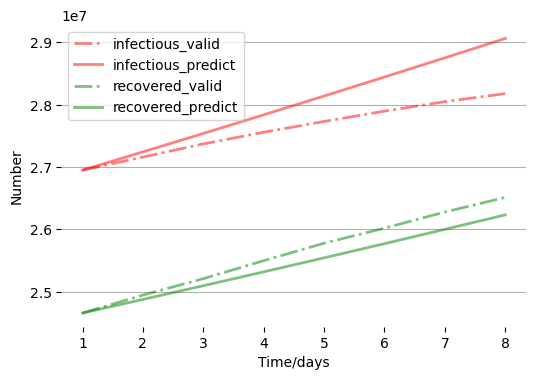

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
# 确定观察的时间周期
T = len(infectious_valid)
# 设置估计疫情的时间跨度为T天
t = np.linspace(1,T,T)
# 估计三种人数的数量
solution = odeint(SIR, y0_valid, t, args = (beta, gamma))
# 绘图
fig, ax = plt.subplots(facecolor='w', dpi=100)
# 绘制估计的I曲线与真实的I曲线
ax.plot(t, infectious_valid, 'r-.', alpha=0.5, lw=2, label='infectious_valid')
ax.plot(t, solution[:,1], 'r', alpha=0.5, lw=2, label='infectious_predict')
# 绘制估计的R曲线与真实的R曲线
ax.plot(t, recovered_valid, 'g-.', alpha=0.5, lw=2, label='recovered_valid')
ax.plot(t, solution[:,2], 'g', alpha=0.5, lw=2, label='recovered_predict')
# 设置横纵坐标轴
ax.set_xlabel('Time/days')
ax.set_ylabel('Number')
# 添加图例
ax.legend()
ax.grid(axis='y')
plt.box(False)

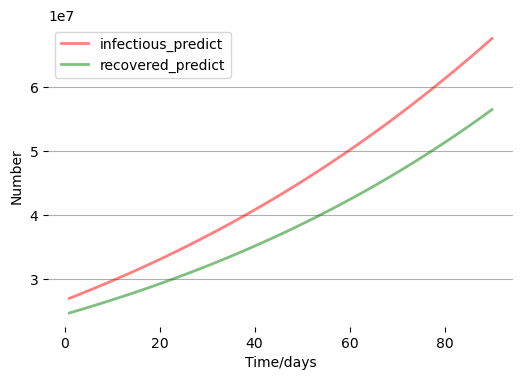

In [9]:
t = np.linspace(1,90,90)

solution = odeint(SIR, y0_valid, t, args = (beta, gamma))
# 绘图
fig, ax = plt.subplots(facecolor='w', dpi=100)
# 绘制估计的I曲线与真实的I曲线
#ax.plot(t, infectious_valid, 'r-.', alpha=0.5, lw=2, label='infectious_valid')
ax.plot(t, solution[:,1], 'r', alpha=0.5, lw=2, label='infectious_predict')
# 绘制估计的R曲线与真实的R曲线
#ax.plot(t, recovered_valid, 'g-.', alpha=0.5, lw=2, label='recovered_valid')
ax.plot(t, solution[:,2], 'g', alpha=0.5, lw=2, label='recovered_predict')
# 设置横纵坐标轴
ax.set_xlabel('Time/days')
ax.set_ylabel('Number')
# 添加图例
ax.legend()
ax.grid(axis='y')
plt.box(False)